# Telco Churn Exploratory Data Analysis

#### Importing Libraries

In [1]:
# Standard Analysis Tools
import pandas as pd
import numpy as np
import pickle
import sys

# Visualisation Tools
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

# User Defined Functions
from utils import cleaning
from utils import visualisation

# Settings
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset and Initial Checks

In [2]:
df = pd.DataFrame(pd.read_csv('./data/telco_customer_churn.csv'))

In [3]:
df.shape

(7043, 21)

In [4]:
# Checking data types
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

Examining the data and their respective data types, we observe that 'TotalCharges' is the only variable with a wrong data type. Its values have been processed as strings when they should have been numerical.

In [6]:
# Amending TotalCharges data type
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [7]:
neg_vars = cleaning.check_negative(df)
neg_vars

There are no numeric variables with negative values.


NegativeValues
SeniorCitizen            False
tenure                   False
MonthlyCharges           False
TotalCharges             False

In [8]:
# Checking for missing data
missing_percentages = cleaning.variable_missing_percentage(df)

The dataframe has 21 variables.
There are a total of 1 variables with missing values and their missing percentages are as follows:

TotalCharges    0.16
dtype: float64


In [9]:
# Varaible with missing data
missing_percentages

In [10]:
# Examining the entries with missing values 
df.loc[df.TotalCharges.isnull()]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
488            No  No phone service             DSL                  Yes   
753           Yes                No              No  No internet service   
936           Yes                No             DSL                  Yes   
1082          Yes               Yes              No  No internet service   
1340           No  No phone service             DSL                  Yes   
3331          Yes                No              No  No internet service   
3826          Yes               Yes              No  No internet service   
4380          Yes                No              No  No internet service   
5218          Yes                No              No  No internet service   
6670          Yes               Yes             DSL                   No   
6754          Yes               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85       

In [11]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
# Changing labels for target Churn for clearer visualisations
df.Churn = df.Churn.apply(lambda x :
                         'Churn' if x == 'Yes'
                         else 'Remain')

In [13]:
df.loc[df.tenure == 0].equals(df.loc[df.TotalCharges.isnull()]) 

True

As the entries that were missing data from the 'TotalCharges' column were new customers that have recently signed up with the Telco (tenure == 0), they would not be representative data as they may not have used the Telco services yet. Therefore, we will be dropping these rows from the dataset.

In [14]:
df = df.dropna(axis=0, how='any')

In [15]:
# Checking our missing percentages
missing_percentages = cleaning.variable_missing_percentage(df)

The dataframe has 21 variables.
The dataframe has no missing values in any column.


In [16]:
# Dropping unecessary customerID
df = df.drop('customerID', axis=1)

In [17]:
# Converting 'object' datatypes to 'categorical'
df = cleaning.convert_to_categorical(df)

## Examining Categorical Variables

### Target Variable : Churn

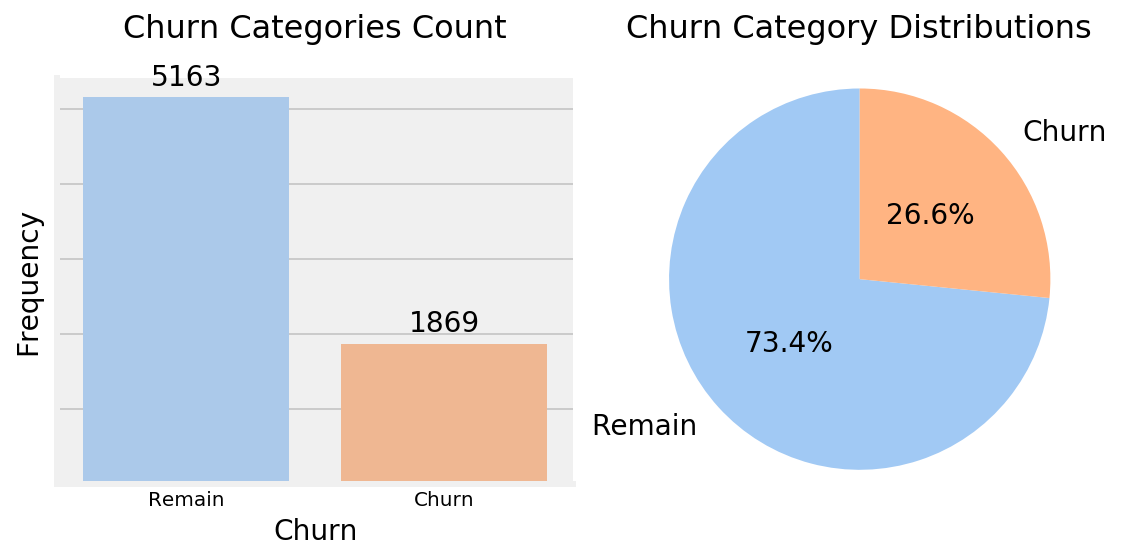

In [18]:
visualisation.count_pie_plots(df, 'Churn')

### Customer Traits Variables

#### Variable : Gender
The Telco has similar number of members from both genders and there appears to be no significant difference in the Churn Rate between genders as well.

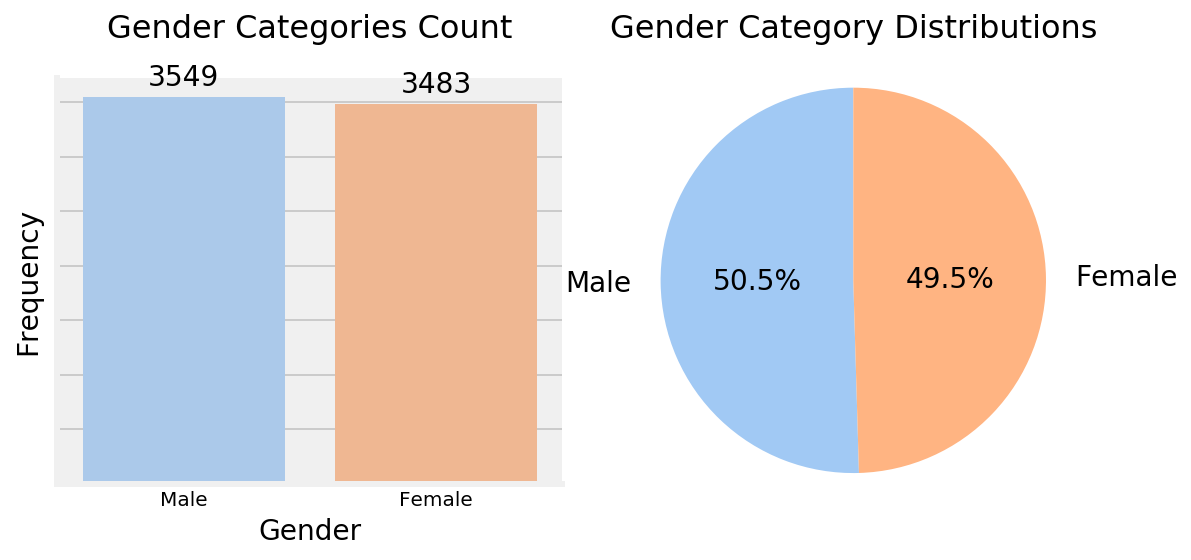

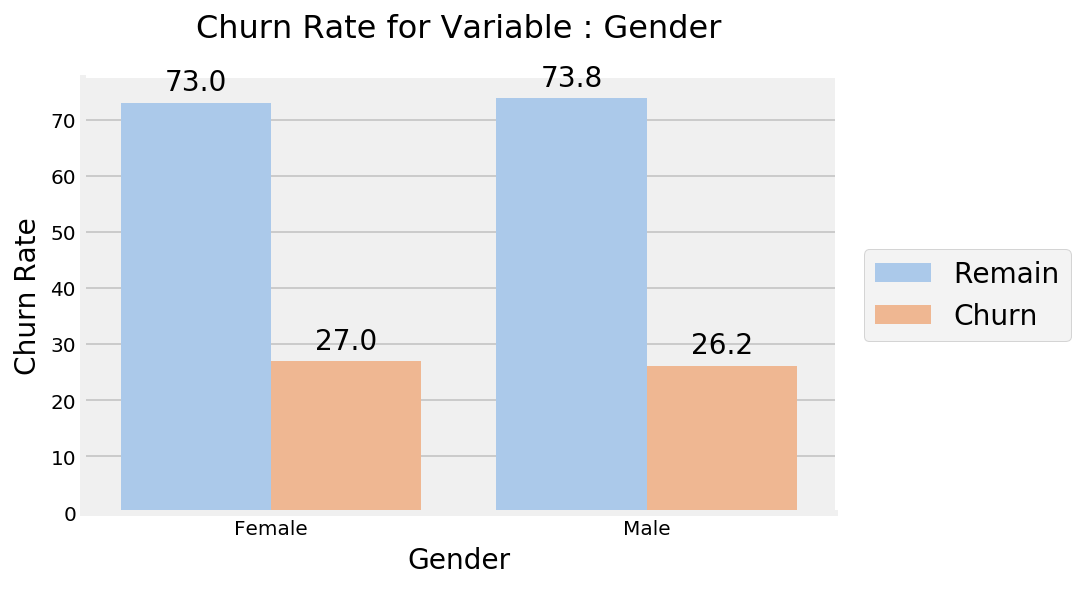

In [19]:
visualisation.count_pie_plots(df, 'gender')
visualisation.barplot_with_hue(df, 'gender', 'Churn', 'Churn Rate')

#### Variable : SeniorCitizen
Majority of customers (84%) are not senior citizens and have a lower churn rate of 24% as compared to seniors at 42%.

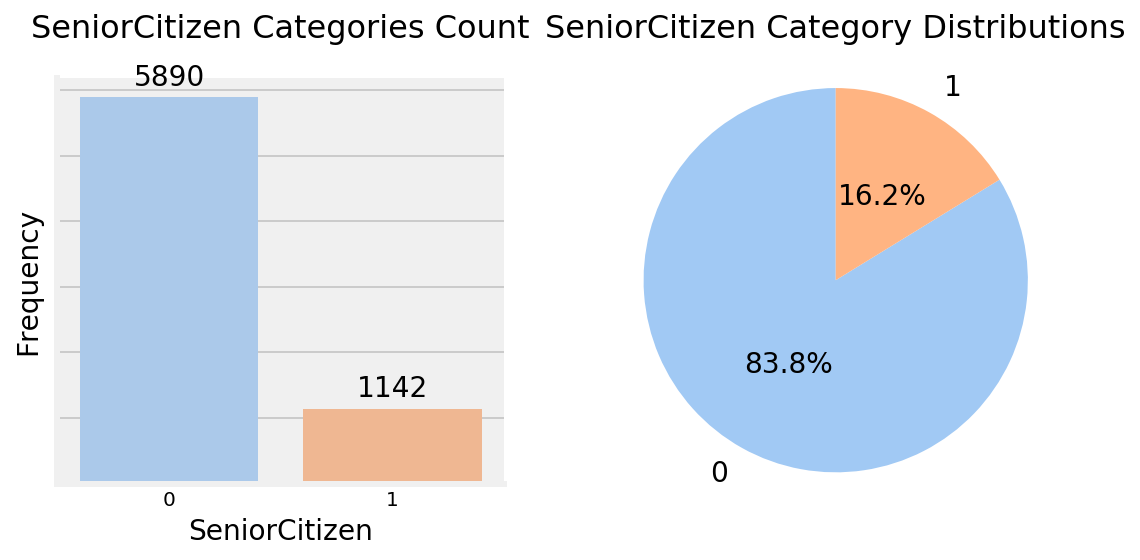

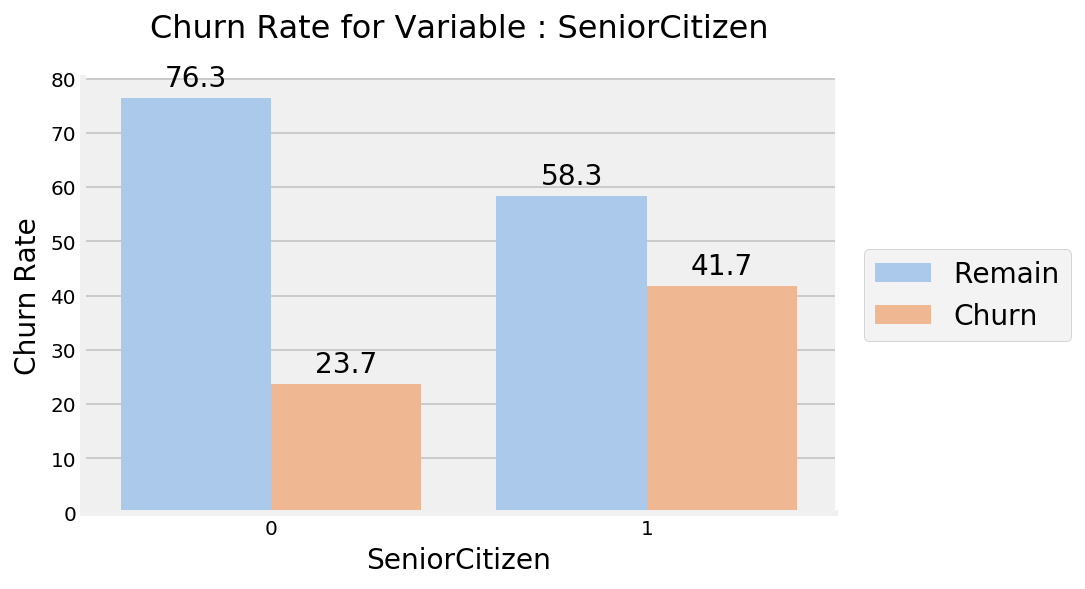

In [20]:
visualisation.count_pie_plots(df, 'SeniorCitizen')
visualisation.barplot_with_hue(df, 'SeniorCitizen', 'Churn', 'Churn Rate')

#### Variable : Partner
There is almost an equal number of customers who are single or have a partner.
However, the churn rate for customers who are single is much 13% higher than those who have partners.

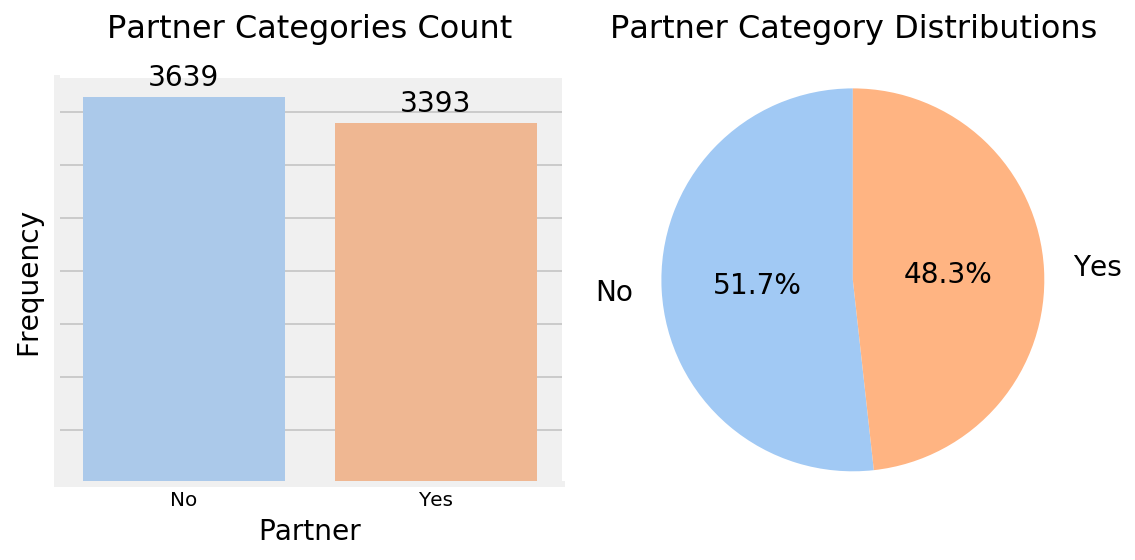

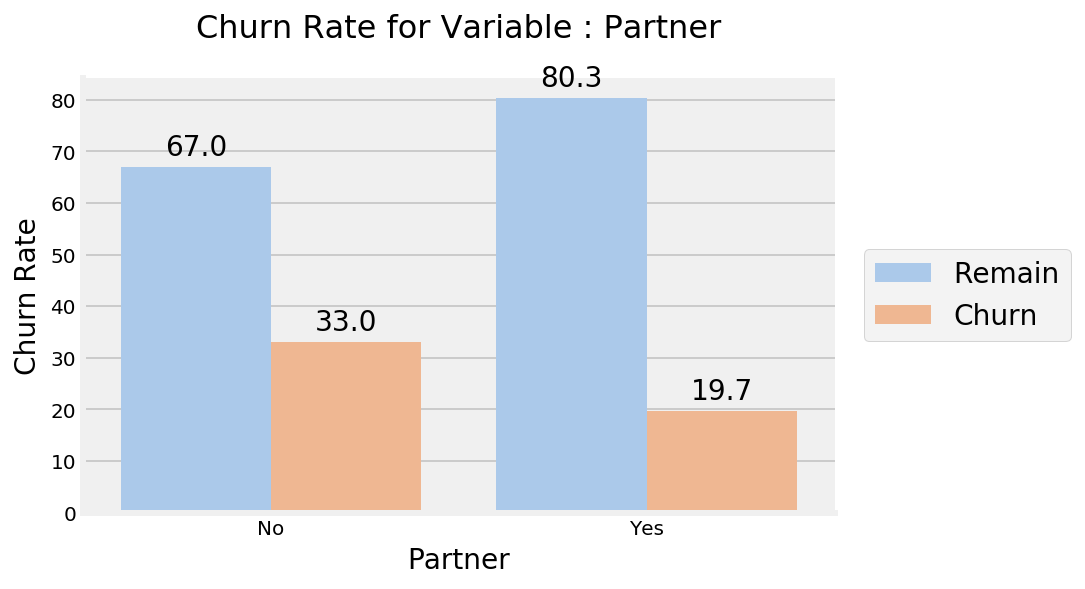

In [21]:
visualisation.count_pie_plots(df, 'Partner')
visualisation.barplot_with_hue(df, 'Partner', 'Churn', 'Churn Rate')

#### Variable : Dependents
The Telco has significantly more customers with no dependents than those who have dependents. It may be indicative that younger people are more attracted to the Telco or that they are the Telco's target audience.

However, the churn rate for customer without dependents are almost two times higher. Again, this might be due to having a larger base of younger customers, whom are more technically savvy and able to source out more competitive plans from other Telcos.

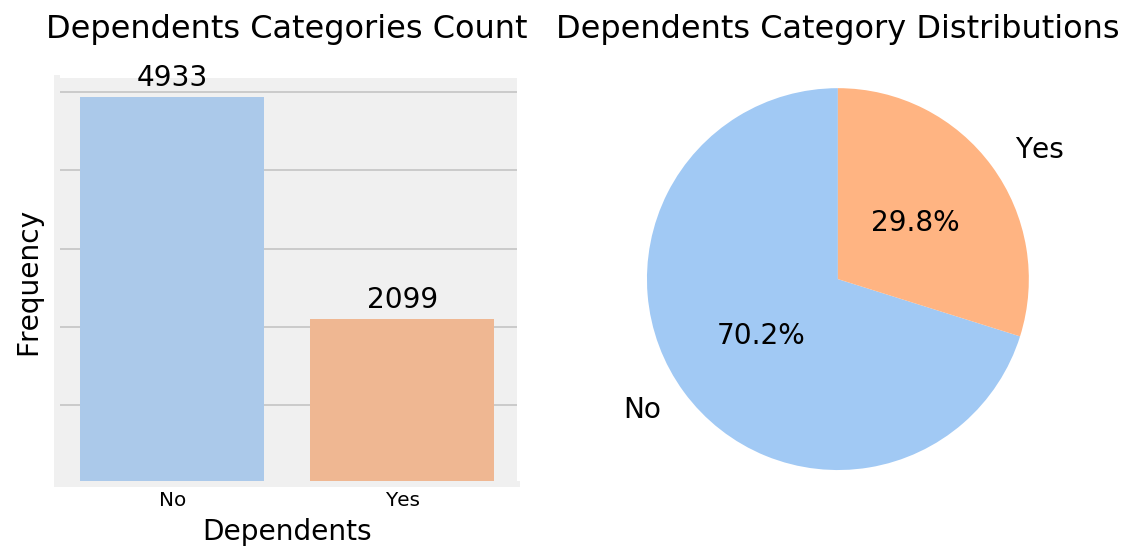

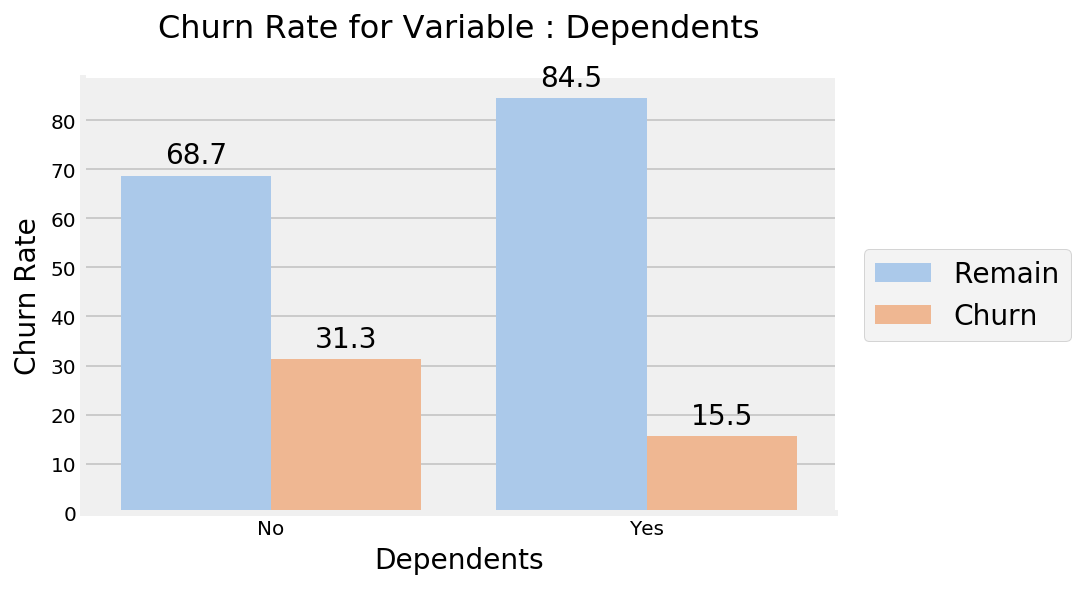

In [22]:
visualisation.count_pie_plots(df, 'Dependents')
visualisation.barplot_with_hue(df, 'Dependents', 'Churn', 'Churn Rate')

### Phone Plan Related Variables 

#### Variable : PhoneService
Most users have contracts with phone services and there is a slightly higher churn rate for customers that have phone services included.

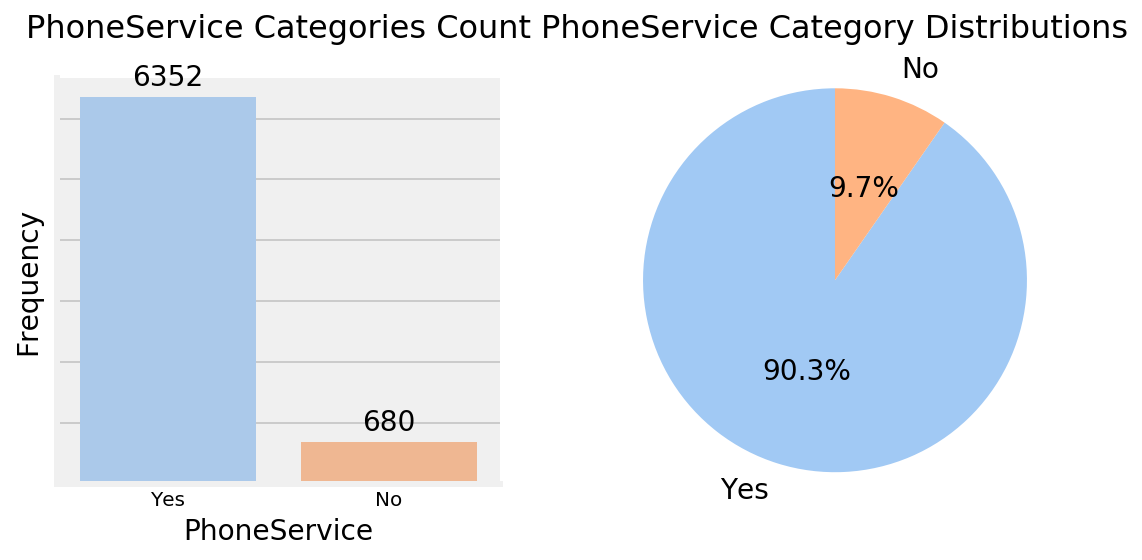

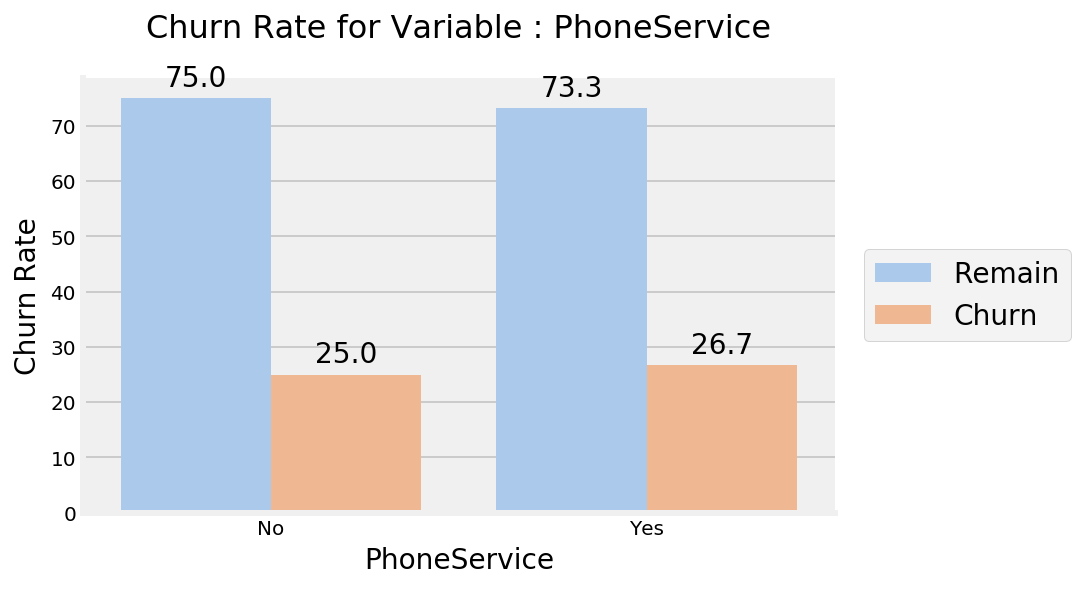

In [23]:
visualisation.count_pie_plots(df, 'PhoneService')
visualisation.barplot_with_hue(df, 'PhoneService', 'Churn', 'Churn Rate')

#### Variable : MultipleLines 
Of the customers that have phone services included, there are more customers that only have a single line.

The churn rate for customers with multiple lines is about 3.5% more than customers with single or no phone lines. 

In [24]:
df.MultipleLines.value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [25]:
df.MultipleLines = df.MultipleLines.apply(lambda x :
                                         'No Phone Service' if x == 'No phone service'
                                         else x)

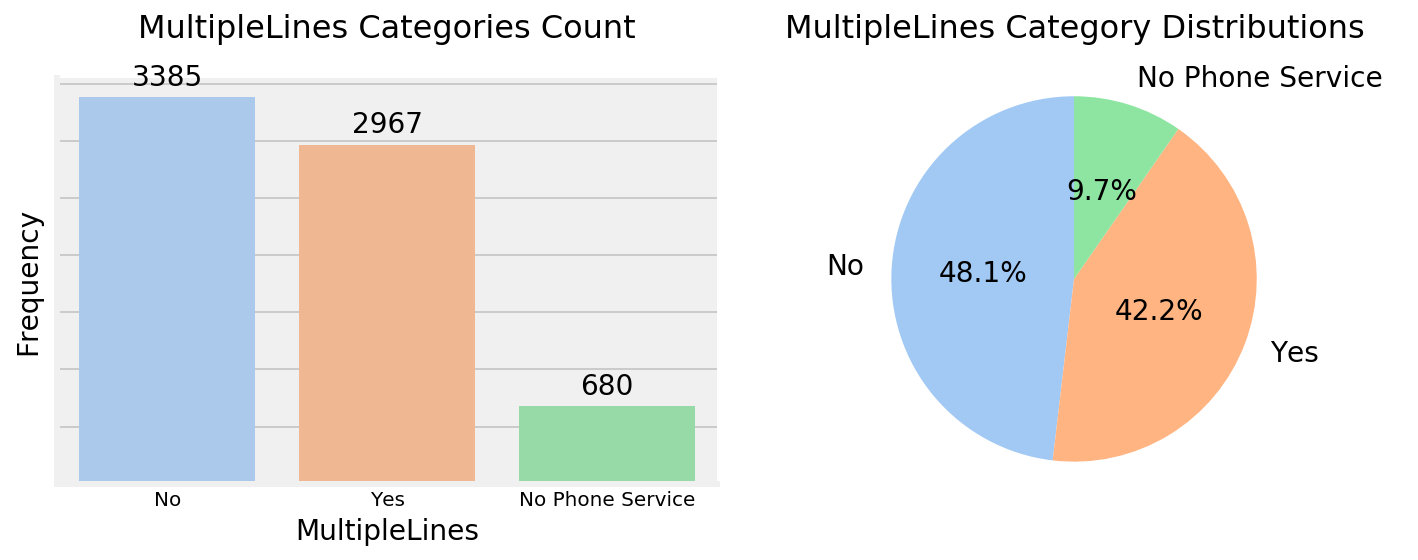

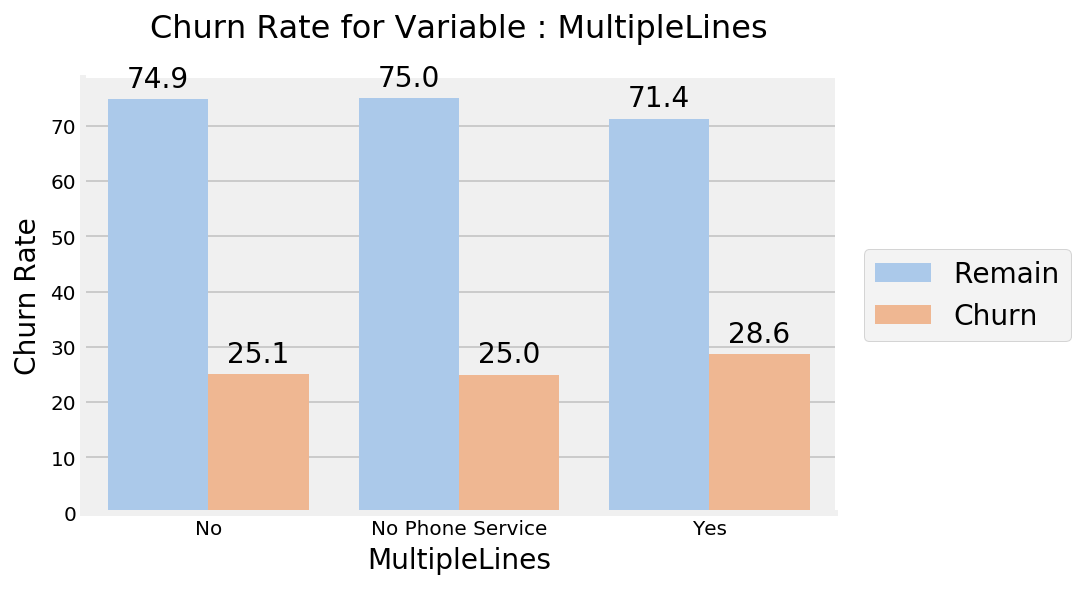

In [26]:
visualisation.count_pie_plots(df, 'MultipleLines', figsize=(10,4))
visualisation.barplot_with_hue(df, 'MultipleLines', 'Churn', 'Churn Rate')

### Internet Plan Related Variables

#### Variable : InternetService
Approximately __20%__ of customers do not have an Internet Service subscription and such customers have a __very low churn rate of only 7.4%__.

For customers that have an internet subscription, about __57%__ opt for higher and more expensive fibre optic plans. Such customers are __two times more likely to churn__ as compared to customers on DSL plans which are slower but cheaper. 

Surprisingly, the __customers who churn__ for both the fibre optic and DSL plans are actually those who are on average __paying less in monthly charges__. This may be indicative that they have selected a cheaper plan but realised that does not meet their needs. This could mean that __there may be some mistakes in the way the sales staff are advising customers__ on which plan to take up. 

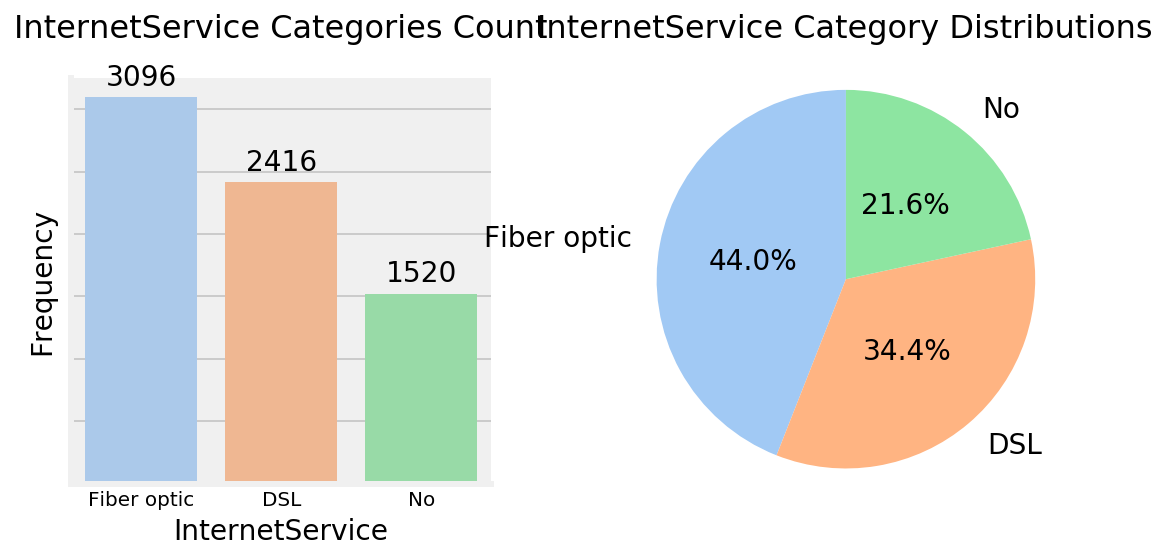

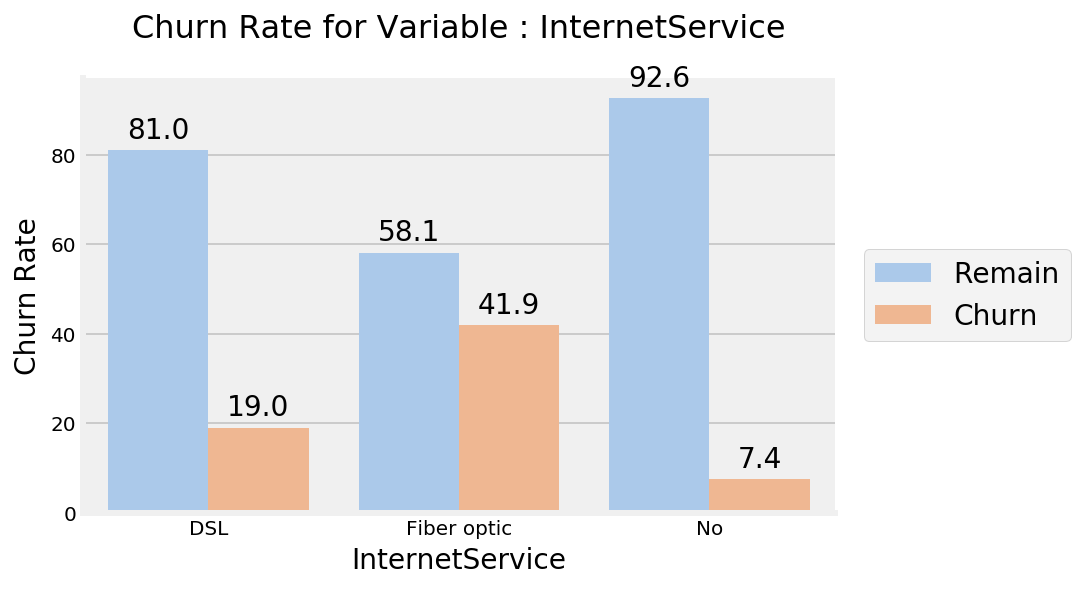

In [27]:
visualisation.count_pie_plots(df, 'InternetService')
visualisation.barplot_with_hue(df, 'InternetService', 'Churn', 'Churn Rate')

In [28]:
# Investigating difference in monthly charges --> Upgrade to plotly
visualisation.interactive_boxplot(df.loc[df.InternetService != 'No'],
                                  'InternetService', 'MonthlyCharges',
                                  hue=True, hue_var='Churn', plot_size=(400,600))

### Creating a new dataframe that only includes customers with internet plans

In [29]:
internet_df = df.loc[df.InternetService != 'No']
internet_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                     'TechSupport', 'StreamingTV', 'StreamingMovies']
for svc in internet_services:
    internet_df[svc] = internet_df[svc].cat.remove_unused_categories()

In [30]:
internet_df.OnlineBackup.value_counts()

No     3087
Yes    2425
Name: OnlineBackup, dtype: int64

#### Variable : OnlineSecurity
Majority of internet customers __(63%)__ did not add on Online Security to their internet plans and these users are __almost three times as likely to churn, with a churn rate of 42%__.  

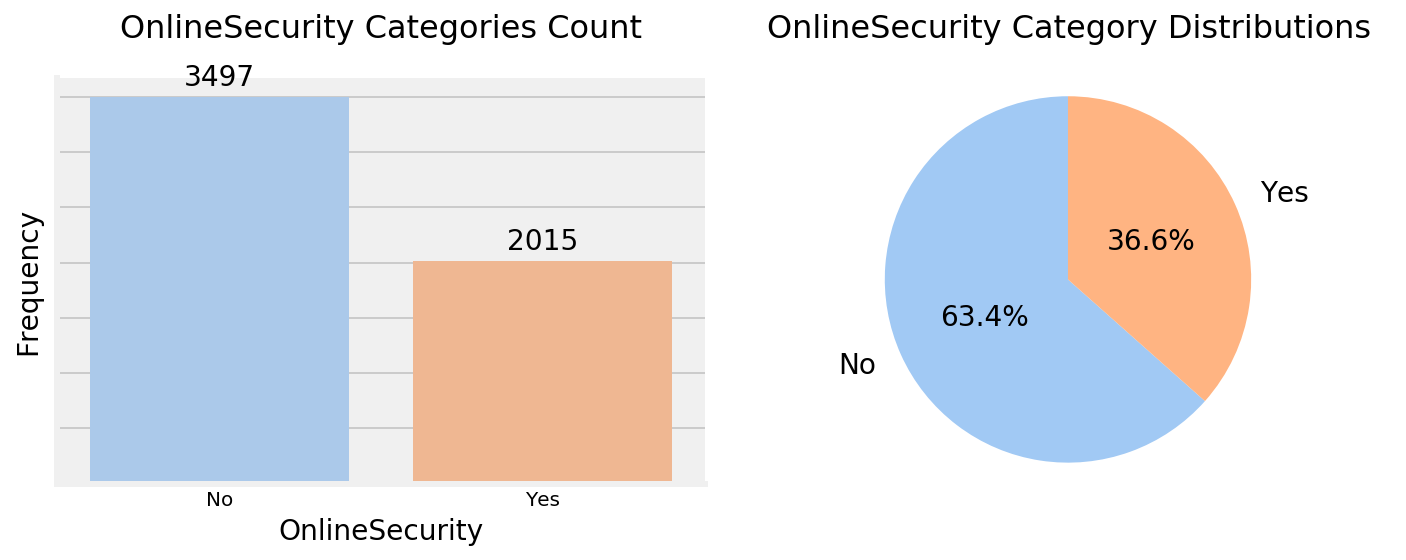

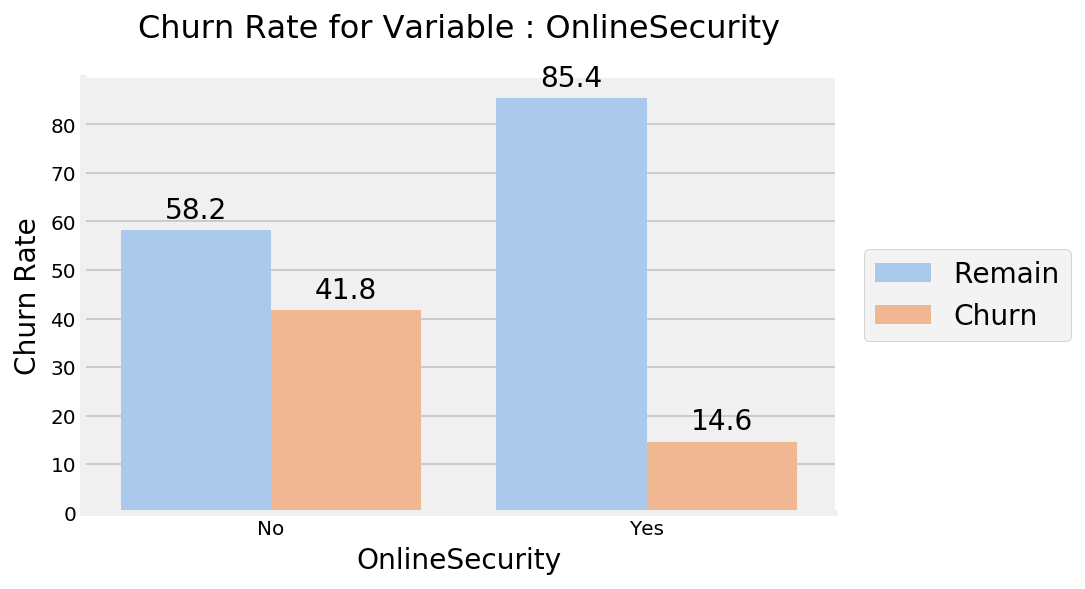

In [31]:
visualisation.count_pie_plots(internet_df, 'OnlineSecurity', figsize=(10,4))
visualisation.barplot_with_hue(internet_df, 'OnlineSecurity', 'Churn', 'Churn Rate')

#### Variable : OnlineBackup
Slightly more than half of internet customers (56%) chose to add on Online Backup service. Customers that did not add the service were had __almost two times higher churn rate (40% vs 22%__)

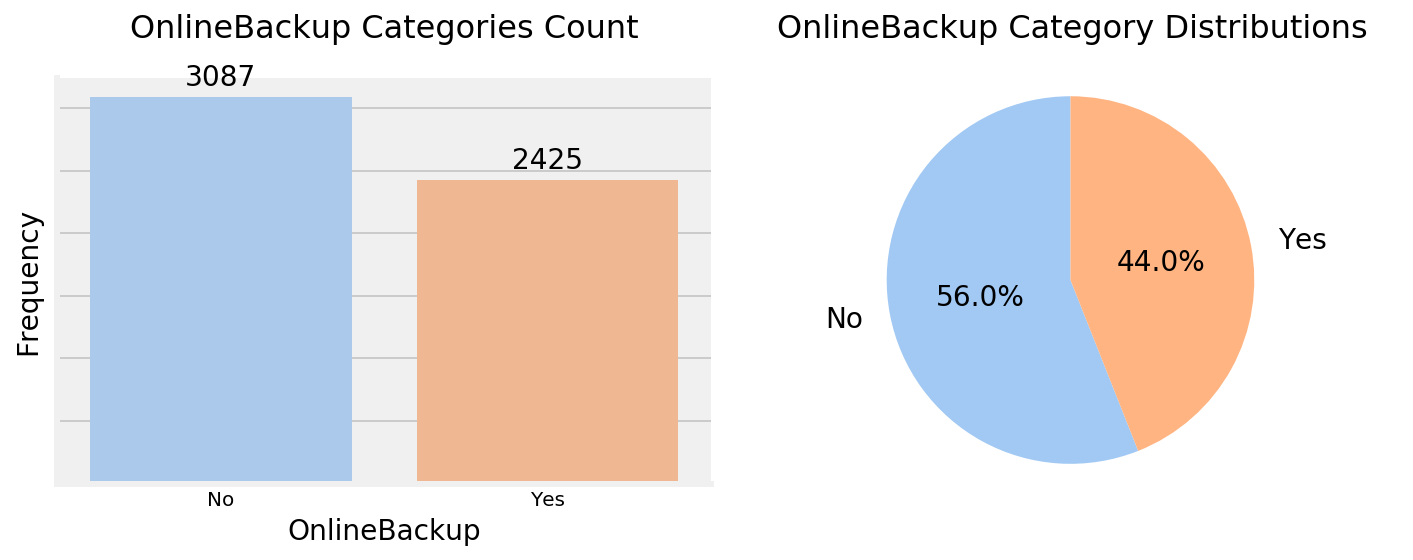

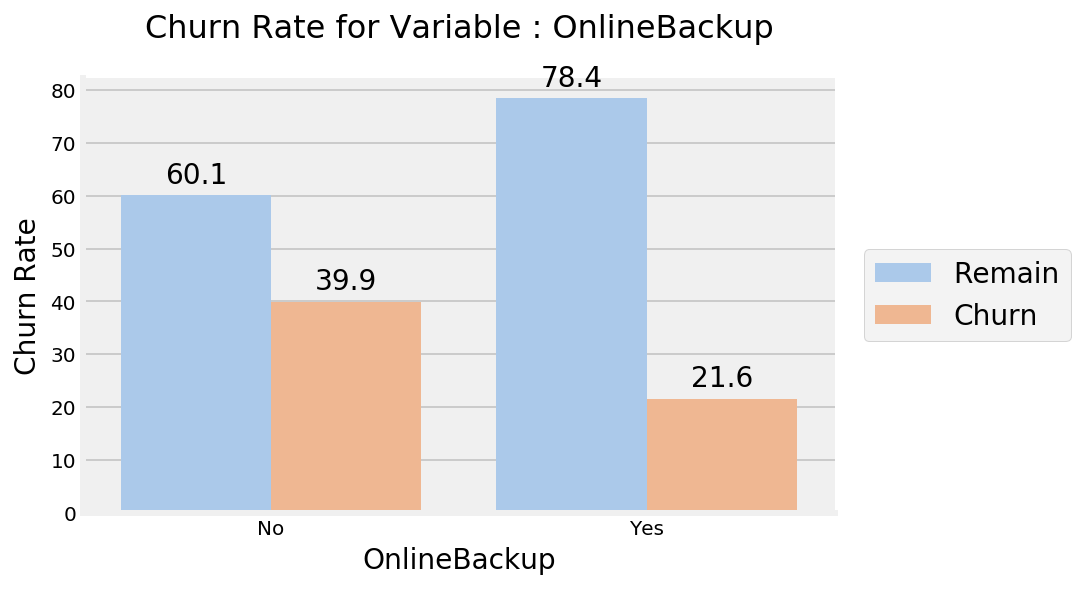

In [32]:
visualisation.count_pie_plots(internet_df, 'OnlineBackup', figsize=(10,4))
visualisation.barplot_with_hue(internet_df, 'OnlineBackup', 'Churn', 'Churn Rate')

#### Variable : DeviceProtection
56% of Internet Customers added Device Protection service to their internet plans. Similar to the other add on services, the users that chose not to add Device Protection had __almost two times higher churn rate (39% vs 23%)__.

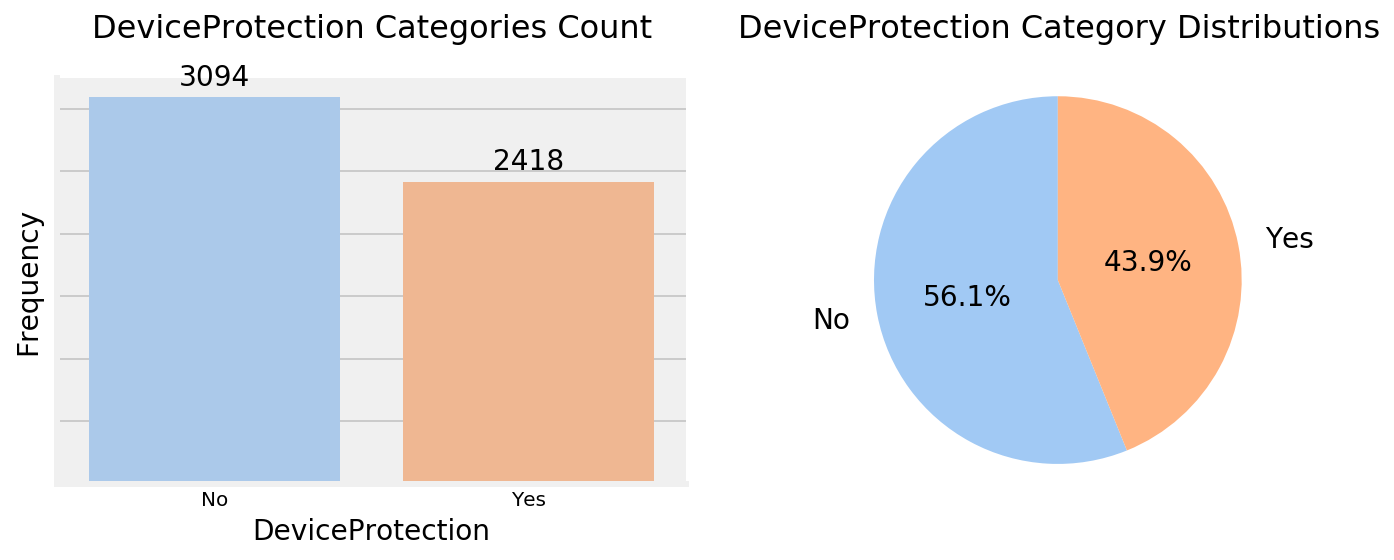

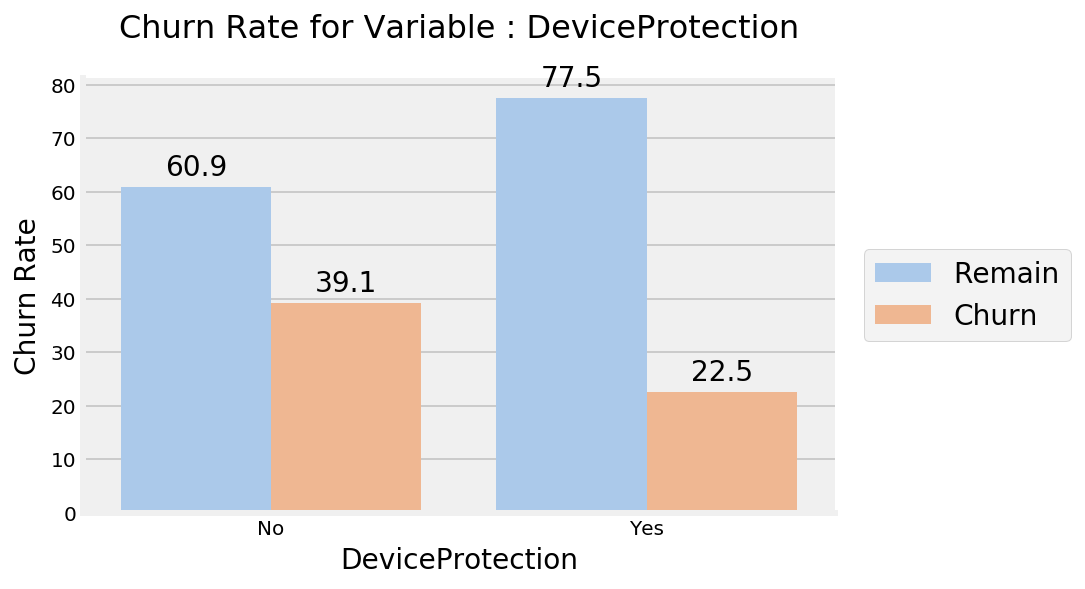

In [33]:
visualisation.count_pie_plots(internet_df, 'DeviceProtection', figsize=(10,4))
visualisation.barplot_with_hue(internet_df, 'DeviceProtection', 'Churn', 'Churn Rate')

#### Variable : TechSupport
Majority of Internet Customers chose not to add Tech Support services to their plans and these customers had a __25% higher churn rate__.

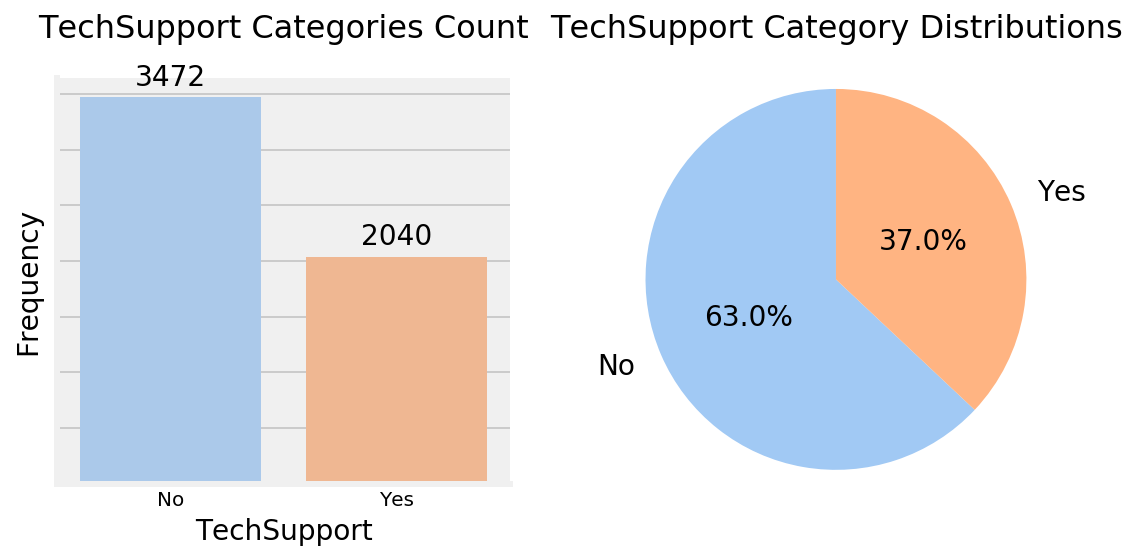

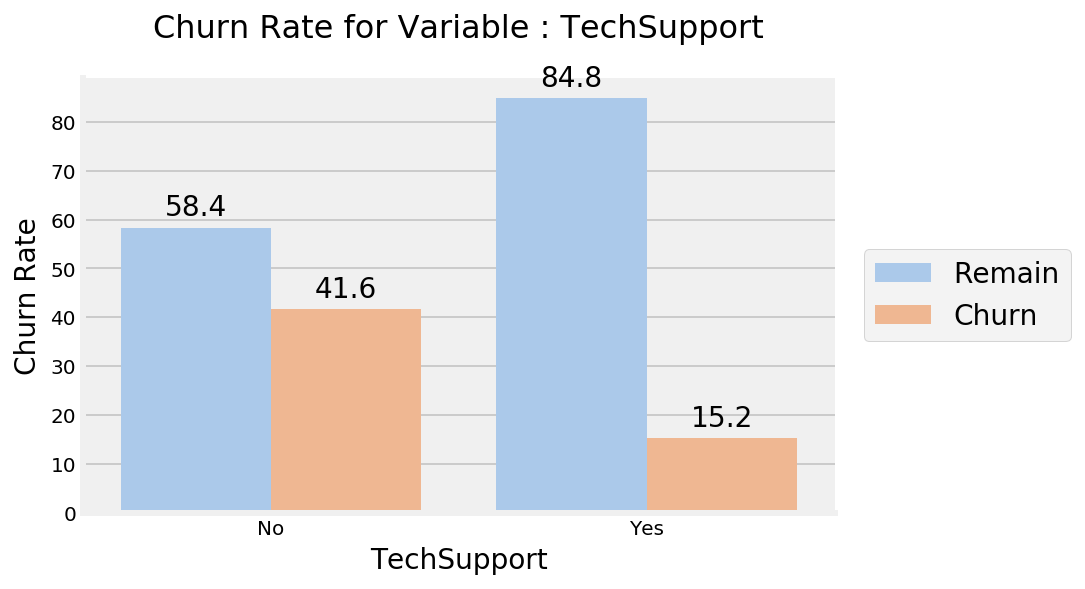

In [34]:
visualisation.count_pie_plots(internet_df, 'TechSupport')
visualisation.barplot_with_hue(internet_df, 'TechSupport', 'Churn', 'Churn Rate')

#### Variable : StreamingTV
There is almost an equal split between Internet Customers who chose to add TV Streaming service to their plans. The churn rate for both types of users were almost equally high as well, 30% for Streaming users and about 34% for non-streaming users.

Compared to other services which had significantly lower chrun rate for users who added on the service, TV Streaming had equally high churn rates with non-streaming users. This may be indicative that the users are more dissatisfied with the TV Streaming offering than other services. 

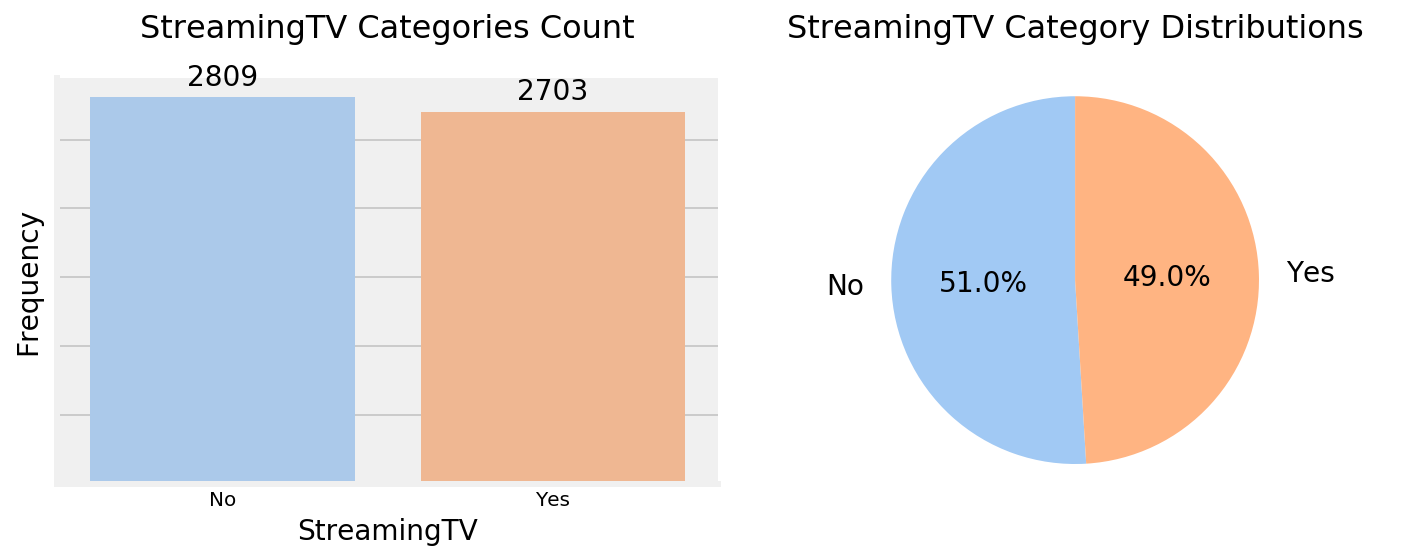

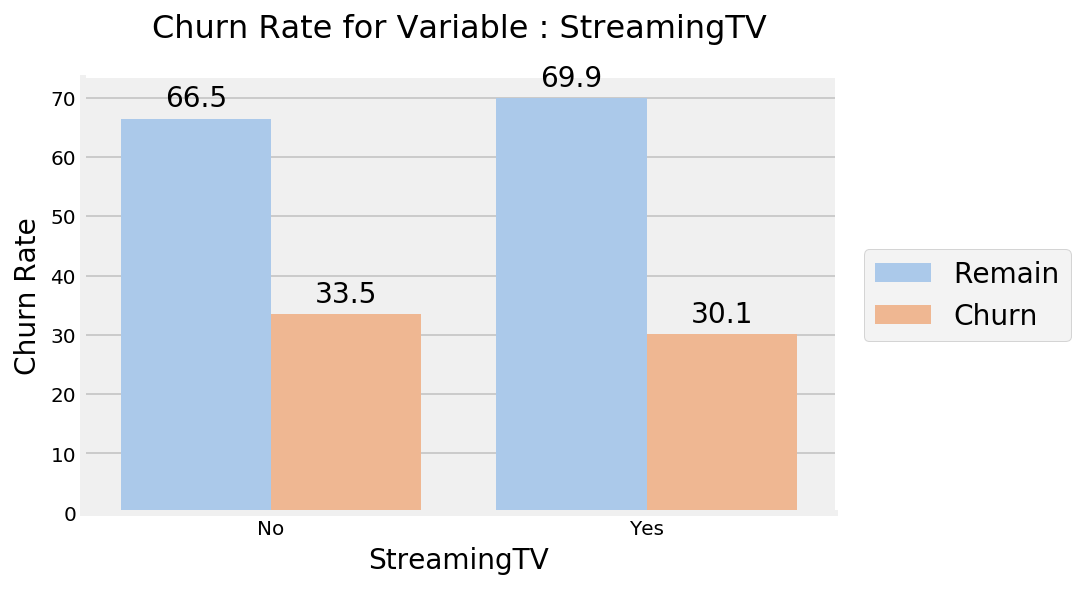

In [35]:
visualisation.count_pie_plots(internet_df, 'StreamingTV', figsize=(10,4))
visualisation.barplot_with_hue(internet_df, 'StreamingTV', 'Churn', 'Churn Rate')

#### Variable : StreamingMovies
The Streaming Movies add-on service has very similar distribution as well as churn rate as the customers who added on TV Streaming services as well.

In [36]:
# Customers
tv_only = len(internet_df.loc[df.StreamingTV == 'Yes'])
movies_only = len(internet_df.loc[df.StreamingMovies == 'Yes'])
tv_and_movie = len(internet_df.loc[(df.StreamingTV == 'Yes') & (df.StreamingMovies == 'Yes')])

print(f'{tv_only} Customers have TV Streaming Services.')
print(f'{movies_only} Customers have Movie Streaming Services.')
print(f'{tv_and_movie} Customers have both Streaming Services.')

2703 Customers have TV Streaming Services.
2731 Customers have Movie Streaming Services.
1939 Customers have both Streaming Services.


In [37]:
round((tv_and_movie / movies_only) * 100, 2)

71.0

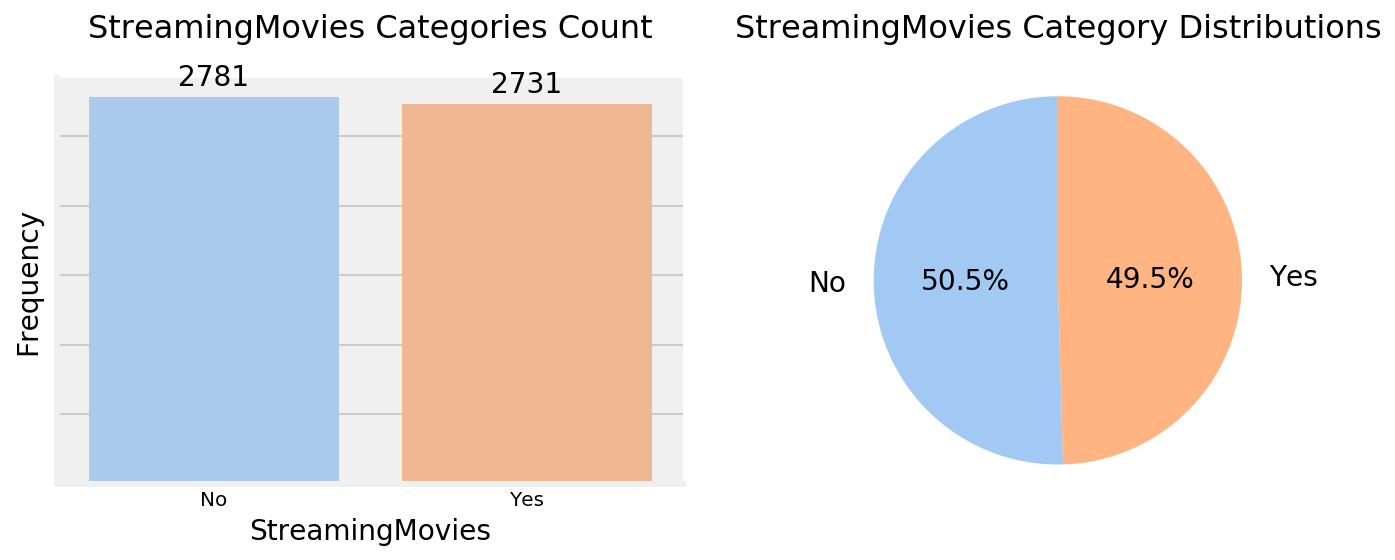

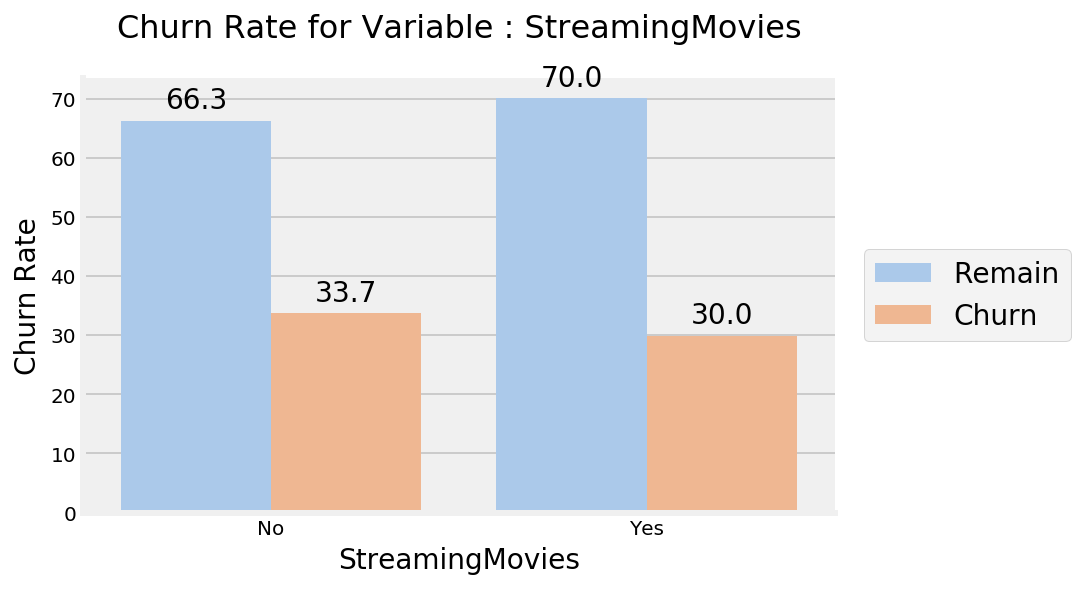

In [38]:
visualisation.count_pie_plots(internet_df, 'StreamingMovies', figsize=(10,4))
visualisation.barplot_with_hue(internet_df, 'StreamingMovies', 'Churn', 'Churn Rate')

## Billing Related Variables

#### Variable : Contract
Majority of customers __(55%)__ are on short-term monthly contracts, while __21%__ are on one year contracts and __24%__ are on two-year contracts.

As expected, customers with longer contract plans have much lower churn rate, as there the longer time remaining on the contract, the larger the penalty for early termination of the contract. Therefore, it is unsurprising that customers on monthly contracts are more likely to churn.

However, the high churn rate of __43%__ is worrying for the Telco, as these customers make up majority of internet service subscribers. This increases the volatilty of sales for the company. 

Looking at the differences in Monthly Charges across the different contract lengths, we find a common pattern whereby __customers who churn have a higher median monthly charge across all three contract types__. This is potentially further evidence that the sales staff may not be correctly advising customers on the optimal additional services to meet their needs. __Customers may be paying for services which they are not utilising as much__, hence feel that it is not worth paying that much, therby deciding to leave the Telco.

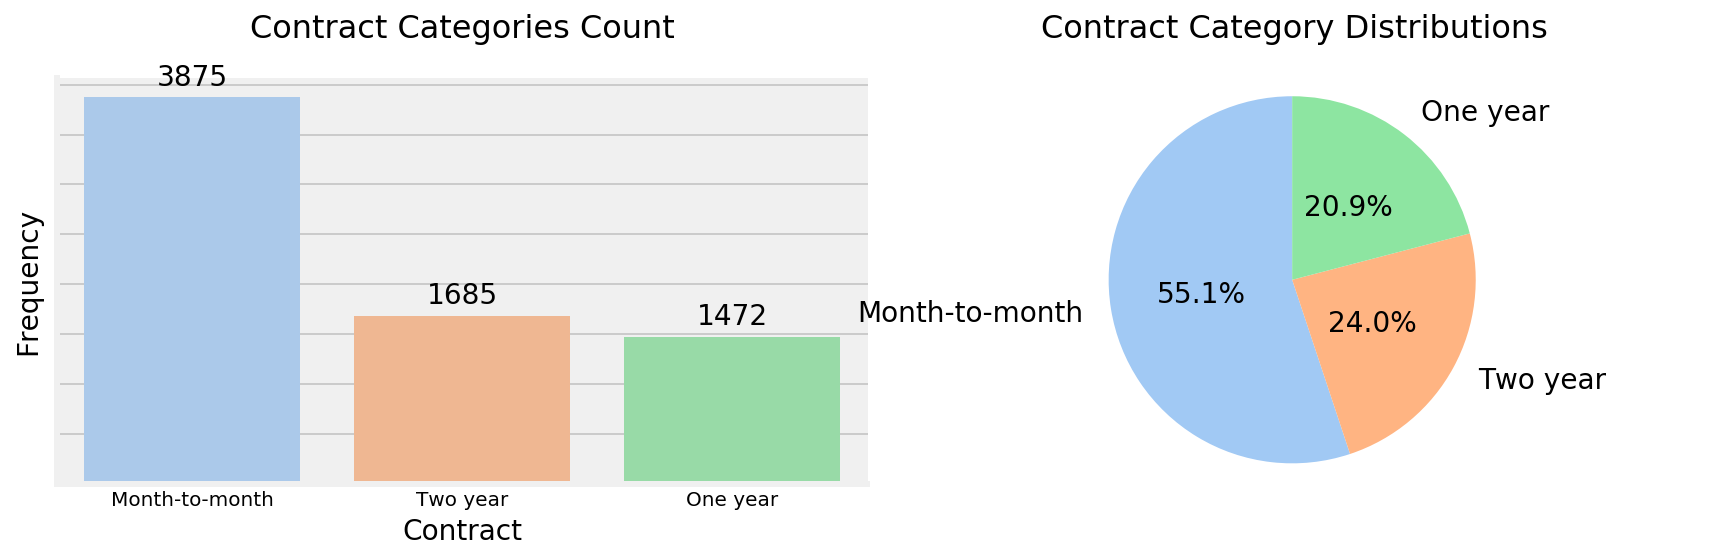

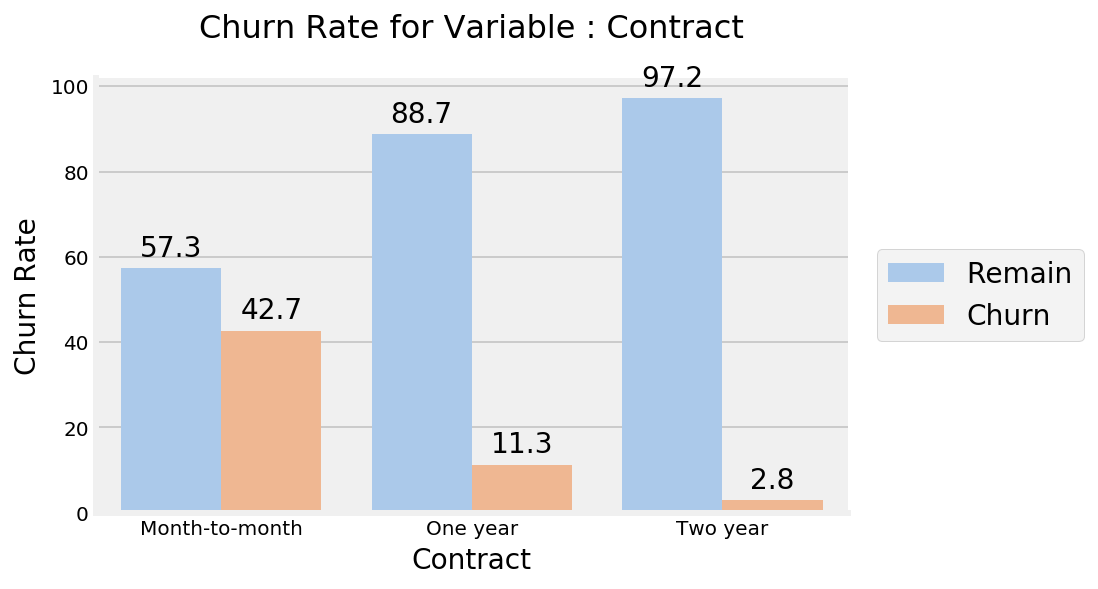

In [39]:
visualisation.count_pie_plots(df, 'Contract', figsize=(12,4))
visualisation.barplot_with_hue(df, 'Contract', 'Churn', 'Churn Rate')

In [40]:
# Difference between monthly charges across different contracts and whether customers churn
# Data is for customers that are subscribed to Internet Service
visualisation.interactive_boxplot(df.loc[df.InternetService != 'No'],
                                  'Contract', 'MonthlyCharges', hue=True, hue_var='Churn')

#### Variable : PaperlessBilling
We postulate that customers whom opt for paperless billing would be more tech savvy and more knowledgeable on different Internet Service plans provided by other competitors, and therefore would more likely churn if they find a better deal. 

Furthermore, we believe that younger customers would also be more tech savvy. As we do not have the age groups of our customers, we will use whether they have dependents as a proxy for if a customer is older or younger if they do not have dependents.

From the diagrams below, we can observe that older customers are indifferent between paperless billing. On the other hand, 63% of younger customers opted for paperless billing. Moreover, we observe that the chrun rate is almost twice as high for customers that opt for paperless billing for both older and younger customers. Furthermore, for customers that opt for paperless billing, the churn rate for younger customers is almost twice as high (38% vs 20%) than older customers.

Therefore, there may be a need for the Telco to create a new offering that is more competitive for younger, tech savvy individuals. 

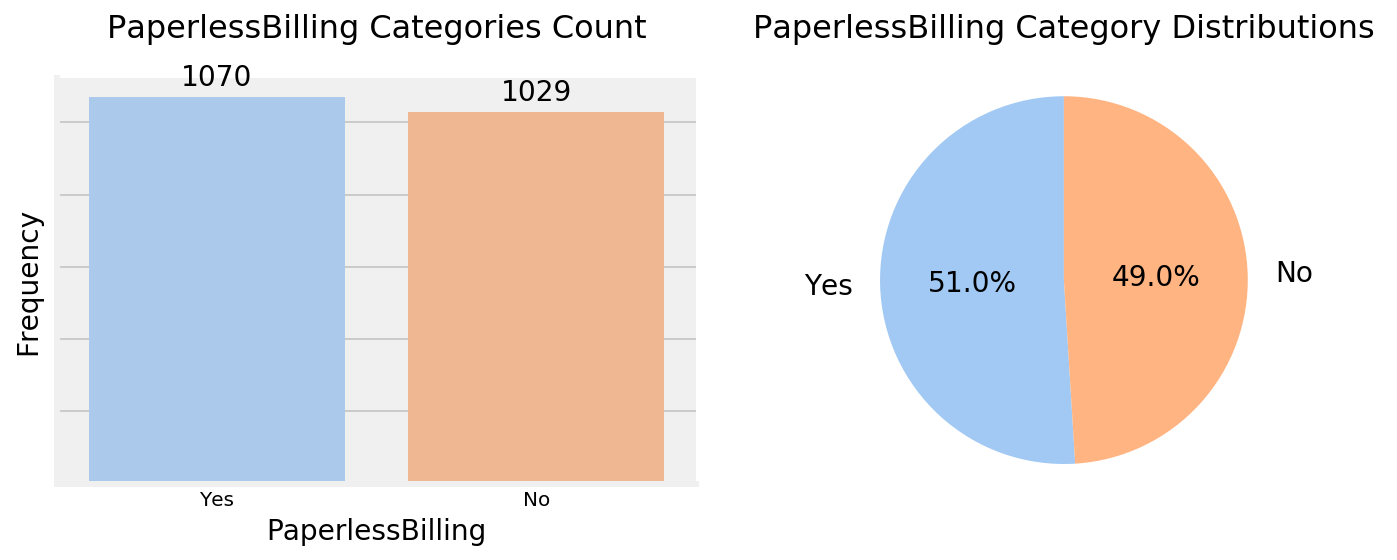

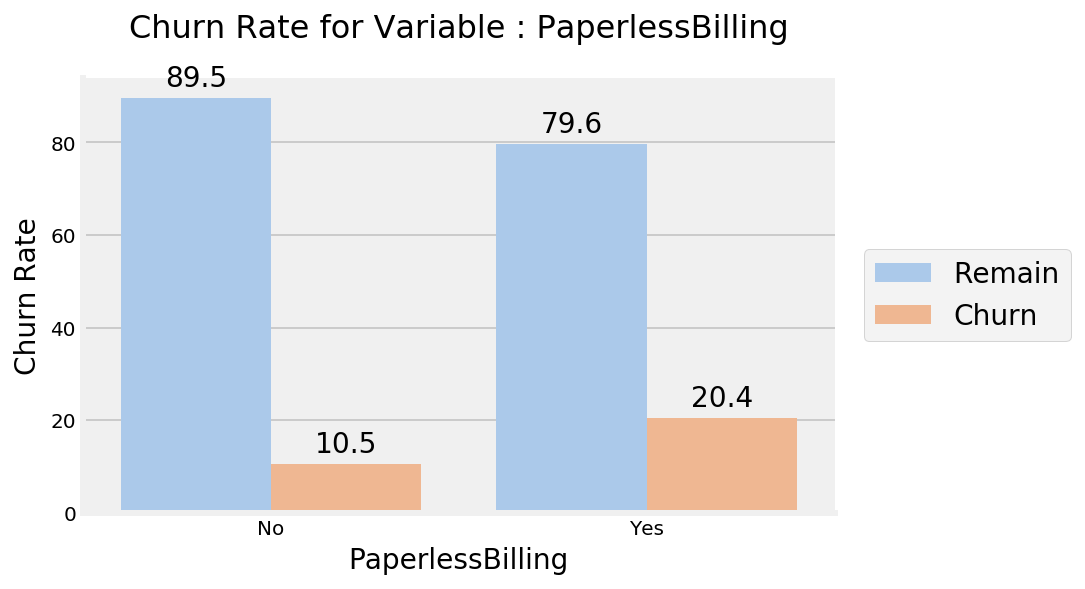

In [41]:
visualisation.count_pie_plots(df.loc[df.Dependents == 'Yes'], 'PaperlessBilling', figsize=(10,4))
visualisation.barplot_with_hue(df.loc[df.Dependents == 'Yes'], 'PaperlessBilling', 'Churn', 'Churn Rate')

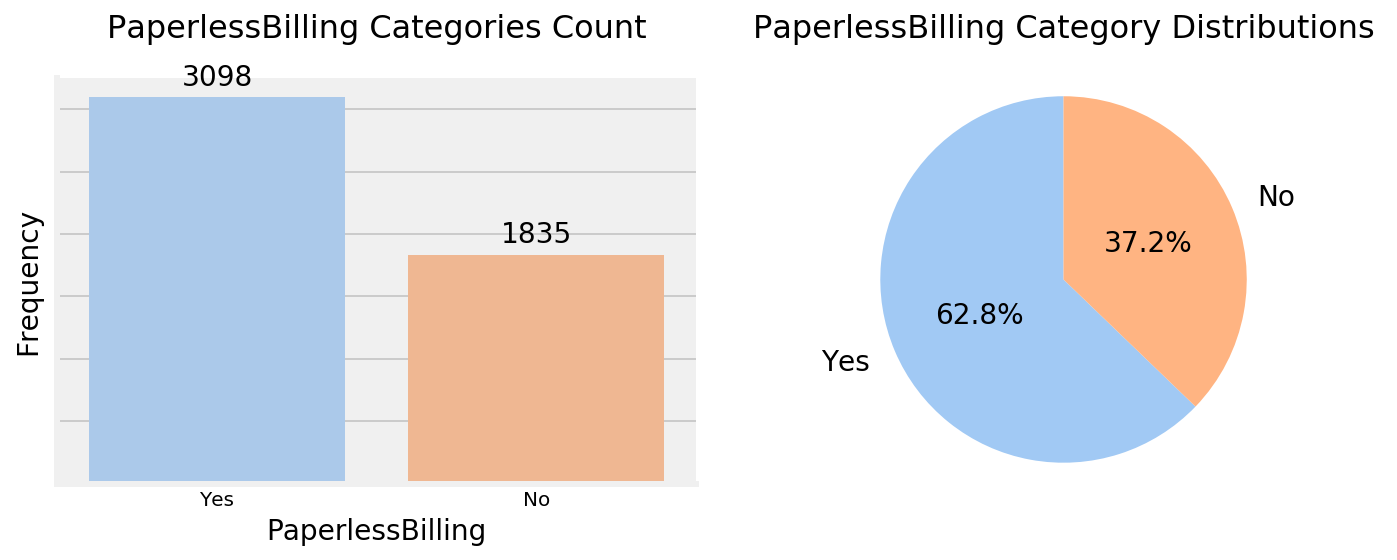

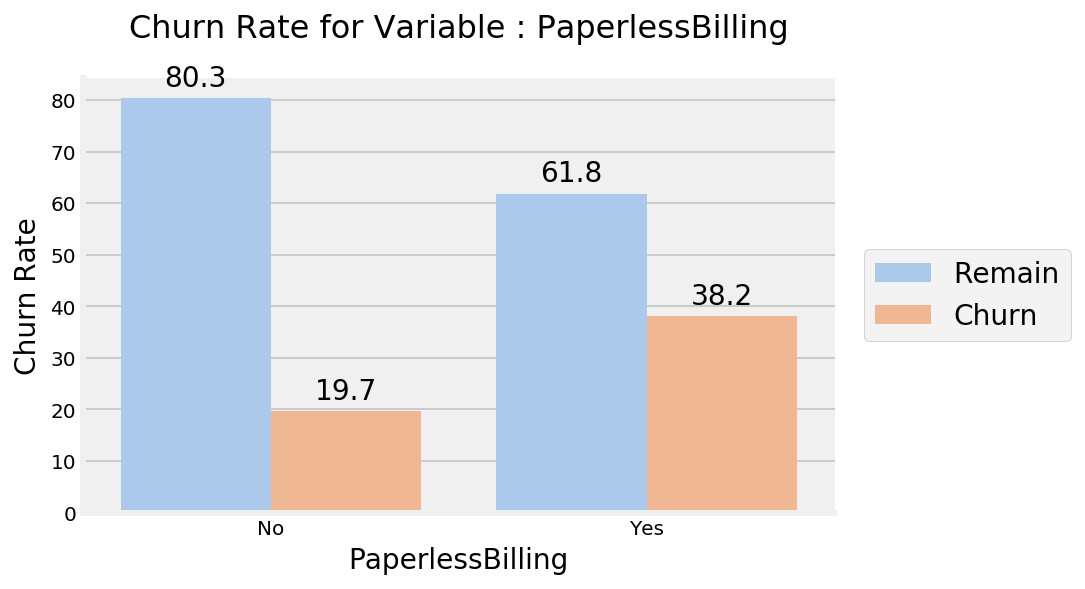

In [42]:
visualisation.count_pie_plots(df.loc[df.Dependents == 'No'], 'PaperlessBilling', figsize=(10,4))
visualisation.barplot_with_hue(df.loc[df.Dependents == 'No'], 'PaperlessBilling', 'Churn', 'Churn Rate')

#### Variable : PaymentMethod
The most common method of payment is via Electronic Checks, which about a third of customers use. The other methods of payment such as Mailed Checks, Credit Card or Bank Transfer all have similar usage of about 22% among customers.

The only physical method of payment by Mailed Checks has the second highest churn rate of close to 20%. 

Among the electronic methods, Credit Cards and Bank Transfers have similar churn rates of 15% and 17% respectively. However, customers that pay using __Electronic Checks__ have a much higher churn rate of __45%__, __almost three times higher__ than other electronic means of payment.

In [43]:
# Changing category names for better presentation
df.PaymentMethod = df.PaymentMethod.apply(lambda x :
                                         'E-Check' if x == 'Electronic check'
                                         else 'Check' if x == 'Mailed check'
                                         else 'Credit Card' if x == 'Credit card (automatic)'
                                         else 'Bank Transfer' if x == 'Bank transfer (automatic)'
                                         else x)

In [44]:
df.PaymentMethod.value_counts()

E-Check          2365
Check            1604
Bank Transfer    1542
Credit Card      1521
Name: PaymentMethod, dtype: int64

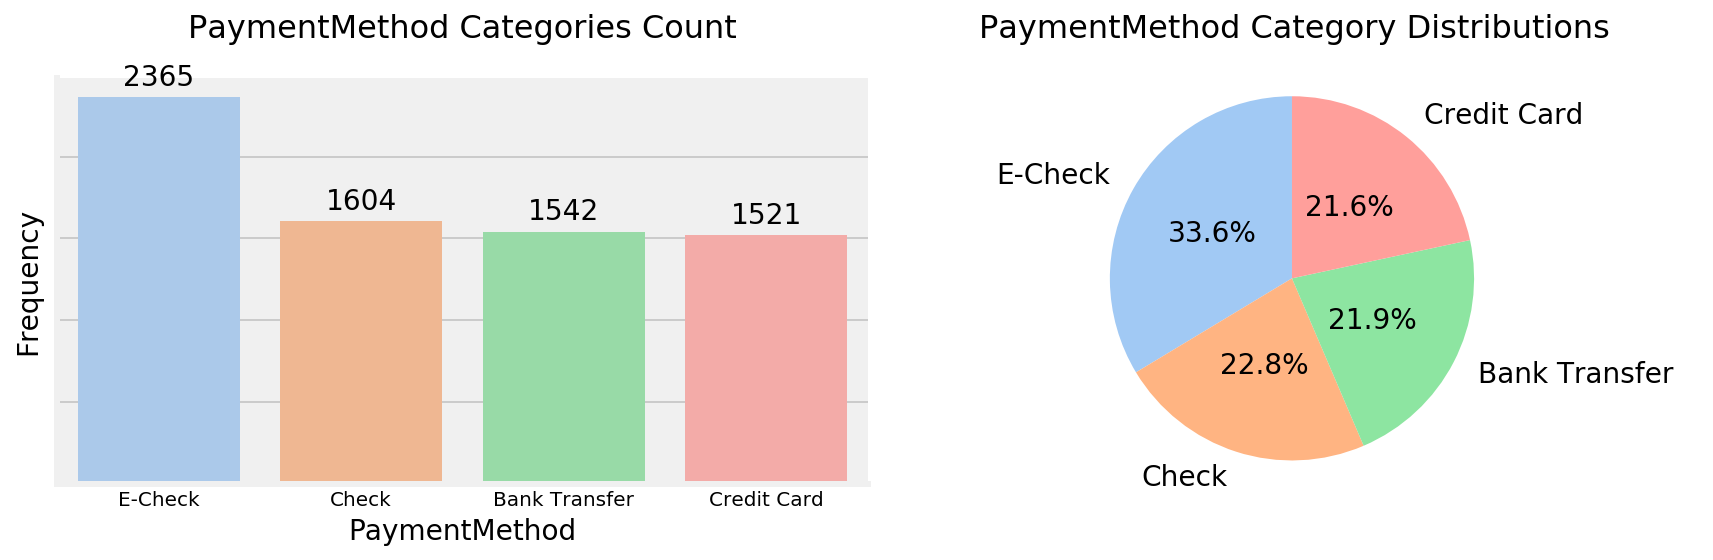

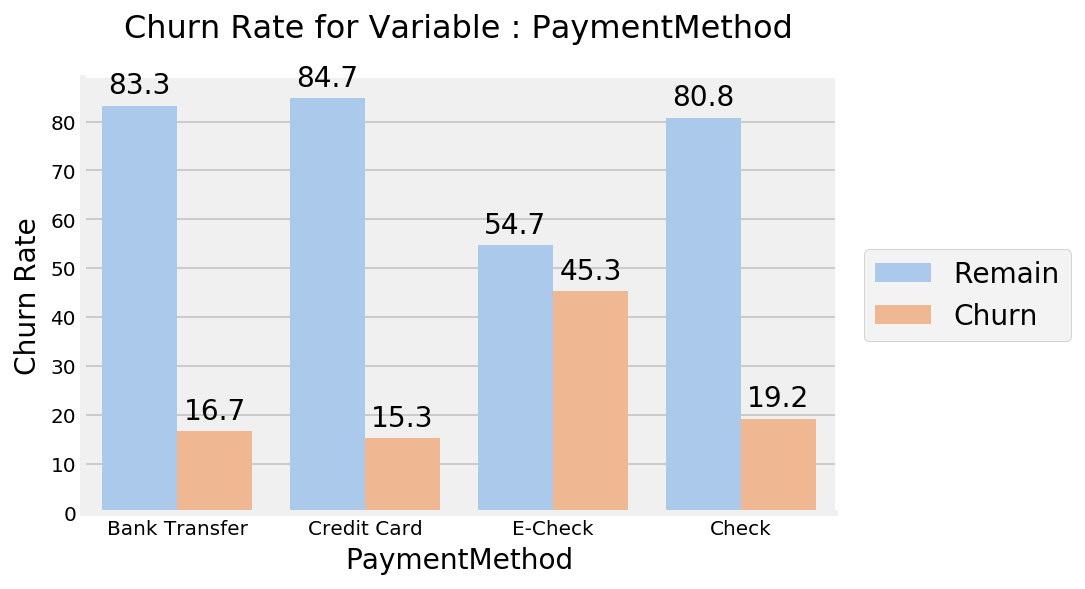

In [45]:
visualisation.count_pie_plots(df, 'PaymentMethod', figsize=(12,4))
visualisation.barplot_with_hue(df, 'PaymentMethod', 'Churn', 'Churn Rate')

In [46]:
visualisation.interactive_boxplot(df, 'PaymentMethod', 'MonthlyCharges', hue=True, hue_var='Churn')

#### Variables : Monthly charges and Tenure

In [47]:
# Creating separate dataframes for customers that churn or remain
churn_df = df.loc[df.Churn == 'Churn']
remain_df = df.loc[df.Churn == 'Remain']

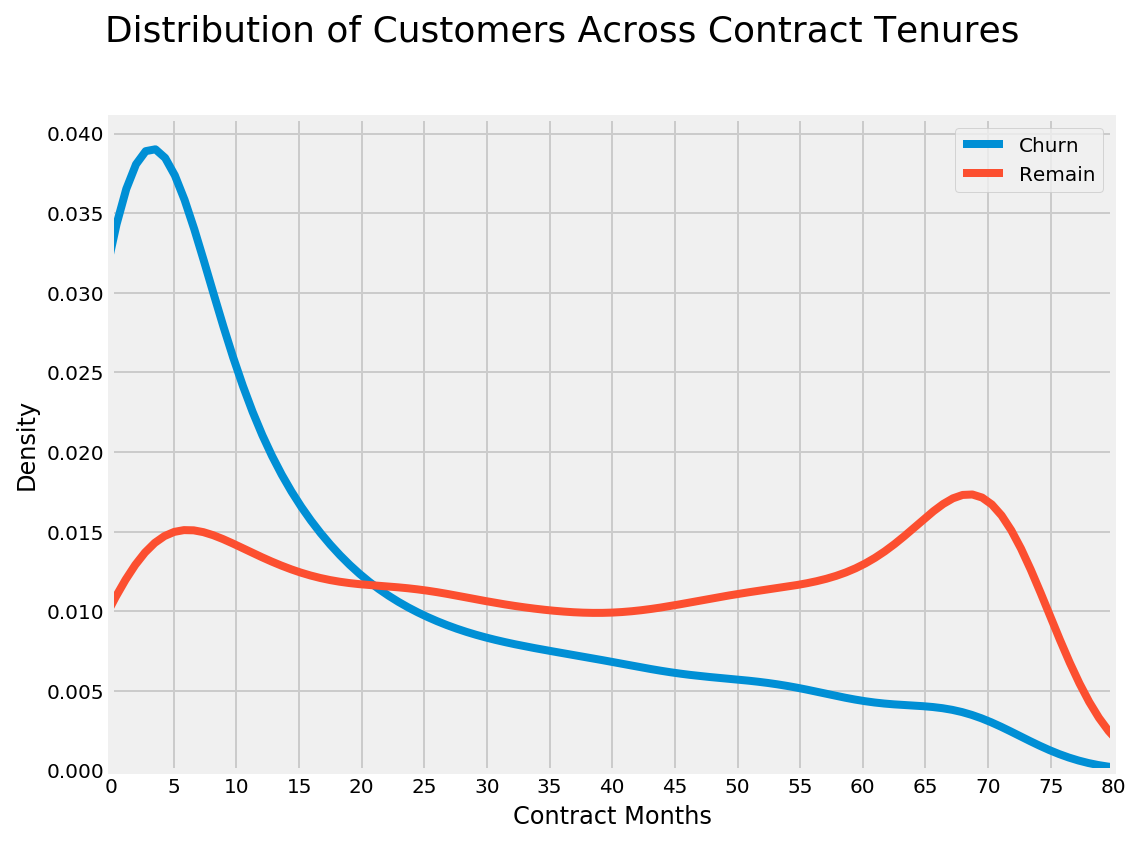

In [48]:
# Distribution of customers across different contract tenures
plt.figure(figsize=(8,6))
sns.kdeplot(churn_df.tenure, label='Churn')
sns.kdeplot(remain_df.tenure, label='Remain')
plt.title('Distribution of Customers Across Contract Tenures', y=1.1, x=0.45, size=18)
plt.ylabel('Density')
plt.xlabel('Contract Months')
plt.xlim(0,80)
plt.xticks(np.arange(0,85, step=5))
plt.show();

From the above diagram, we can see that most of the customers that churn tend to have shorter tenures of less than one year, and most tend to churn within 4 months. 

As for customers that remain with the company, there are roughly the same amount of users at each tenure length, aside from having slightly more newer customers (tenure < 6 months) and very long term customers (tenure > 5 years). The two peaks could have been due to the Telco having a promotion at that time.

#### Comparing MonthlyCharges Across Different Contract Tenures

In [49]:
print(churn_df.MonthlyCharges.median())
print(remain_df.MonthlyCharges.median())

79.65
64.45


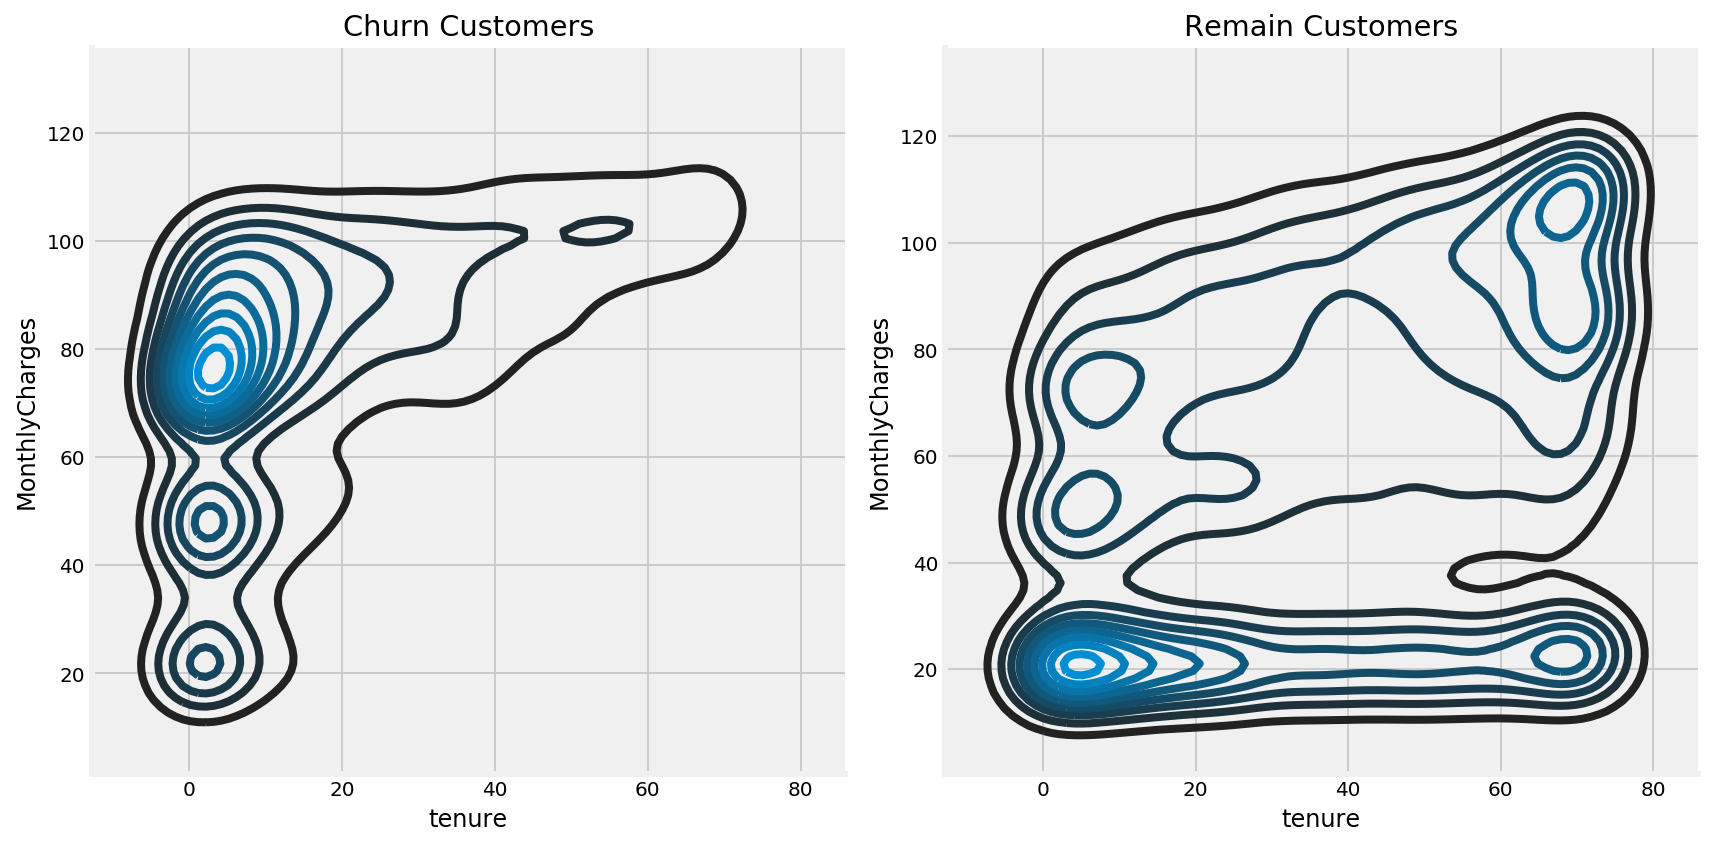

In [50]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.kdeplot(churn_df.tenure, churn_df.MonthlyCharges, ax=ax1)
sns.kdeplot(remain_df.tenure, remain_df.MonthlyCharges, ax=ax2)
ax1.title.set_text('Churn Customers')
ax2.title.set_text('Remain Customers')
sns.despine()
plt.tight_layout()
plt.show();

From the above diagram, we observe for Churn customers, there is a large concentration of customers that have short tenures and high monthly charge. 

Therefore, it may be due to customers signing up for a more expensive plan but realising shortly after that they do not utilise the services as much as they thought they would, and thus choosing to terminate the contract.

As for customers that remain, we observe that there is a large concentration of users with cheap plans for shorter contract tenures of less than 2 years. 

## Processing Categorical Features

In [51]:
# Changing variables with two levels
df = df.replace({
    'gender' : {'Male' : 1, 'Female' : 0},
    'Partner' : {'Yes' : 1, 'No' : 0},
    'Dependents' : {'Yes' : 1, 'No' : 0},
    'PhoneService' : {'Yes' : 1, 'No' : 0},
    'PaperlessBilling' : {'Yes' : 1, 'No' : 0},
    'Churn' : {'Churn' : 1, 'Remain' : 0},
})

In [52]:
# Label encoding internet services related variables
df = df.replace({
    'OnlineSecurity' : {'Yes' : 1, 'No' : 0, 'No internet service' : -1},
    'OnlineBackup' : {'Yes' : 1, 'No' : 0, 'No internet service' : -1},
    'DeviceProtection' : {'Yes' : 1, 'No' : 0, 'No internet service' : -1},
    'TechSupport' : {'Yes' : 1, 'No' : 0, 'No internet service' : -1},
    'StreamingTV' : {'Yes' : 1, 'No' : 0, 'No internet service' : -1},
    'StreamingMovies' : {'Yes' : 1, 'No' : 0, 'No internet service' : -1}
})

### Dataset With All Levels of Categories Included
Some algorithms that we will be using during the modelling phase will benefit from having all of the categorical levels within the dataset.

In [53]:
df_all_levels = pd.get_dummies(df)

In [54]:
df_all_levels.columns = df_all_levels.columns.str.replace(' ', '_')
df_all_levels.columns = df_all_levels.columns.str.replace('-', '_')

In [55]:
with open('cleaned_dataset_all_levels.pickle', 'wb') as f:
    pickle.dump (df_all_levels, f)

### Dataset With k-1 Categories
Some algorithms perform worse when there are highly correlated variables due to the dummy trap, therefore we created a dataset that drops one of the levels.

In [56]:
df_drop_first = pd.get_dummies(df, drop_first=True)

In [57]:
df_drop_first.columns = df_drop_first.columns.str.replace(' ', '_')
df_drop_first.columns = df_drop_first.columns.str.replace('-', '_')

In [58]:
with open('cleaned_dataset_drop_first.pickle', 'wb') as f:
    pickle.dump(df_drop_first, f)